In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the training data

train = pd.read_csv("C://Users//Rajaram//Desktop//mith//Train_1617360447408.csv")

# displaying first 5 rows of data
train.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [4]:
test = pd.read_csv("C://Users//Rajaram//Desktop//mith//test_1617360461595.csv")
test.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),?,3,?,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),?,2,?,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),?,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),?,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),?,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [5]:
#Exploratory Data Analysis and Preprocessing and Feature Engineering

train.shape

(66587, 49)

Train data have total 66587 rows and 49 columns.

In [6]:
train.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [7]:
test.shape

(16647, 48)

test data have total 16647 rows and 48 columns.

In [8]:
test.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [9]:
#getting count of missing values in train dataset
# In the dataset missing values are represented as '?' symbol

for col in train.columns:
    if train[col].dtype == object:
         print(col,train[col][train[col] == '?'].count())

race 1504
gender 0
age 0
weight 64454
medical_specialty 32672
diag_1 15
diag_2 231
diag_3 954
diag_4 954
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [10]:
#getting count of missing values in test dataset
# In the dataset missing values are represented as '?' symbol

for col in test.columns:
    if test[col].dtype == object:
         print(col,test[col][test[col] == '?'].count())

race 371
gender 0
age 0
weight 16107
medical_specialty 8081
diag_1 3
diag_2 63
diag_3 247
diag_4 247
X1 0
X2 0
X3 0
X4 0
X5 0
X6 0
X7 0
X8 0
X9 0
X10 0
X11 0
X12 0
X13 0
X14 0
X15 0
X16 0
X17 0
X18 0
X19 0
X20 0
X21 0
X22 0
X23 0
X24 0
X25 0
change 0
diabetesMed 0


In [11]:
# gender was coded differently so we use a custom count for this one   


print('Invalid records in gender column in train dataset : ', train['gender'][train['gender'] == 'Unknown/Invalid'].count())

print('Invalid records in gender column in test dataset : ', test['gender'][test['gender'] == 'Unknown/Invalid'].count())

Invalid records in gender column in train dataset :  2
Invalid records in gender column in test dataset :  1


In [12]:
#Dealing with Missing Values

train.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [13]:
# dropping columns with large number of missing values


train = train.drop(['weight','medical_specialty'], axis = 1)
test = test.drop(['weight','medical_specialty'], axis = 1)

In [14]:
drop_Idx = set(train[(train['diag_1'] == '?') & (train['diag_2'] == '?') & (train['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(train['diag_1'][train['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(train['diag_2'][train['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(train['diag_3'][train['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(train['race'][train['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(train['gender'][train['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(train.index) - set(drop_Idx))
train = train.iloc[new_Idx]

In [15]:
train['X1'].value_counts()

None    60749
Norm     1593
>200      968
>300      818
Name: X1, dtype: int64

In [16]:
categorical = []
for col in train.columns:
    if train[col].dtype == object:
          categorical.append(col)

In [17]:
categorical1 = []
for col in test.columns:
    if test[col].dtype == object:
        categorical1.append(col)

In [18]:
#printing the frequency count of all the categorical features
for col in categorical:
        print("------------  " , col)
        print(train[col].value_counts())

------------   race
Caucasian          49230
AfricanAmerican    12201
Hispanic            1273
Other               1029
Asian                395
Name: race, dtype: int64
------------   gender
Female    34744
Male      29384
Name: gender, dtype: int64
------------   age
[70-80)     16465
[60-70)     14406
[50-60)     11022
[80-90)     10761
[40-50)      6048
[30-40)      2271
[90-100)     1786
[20-30)      1037
[10-20)       292
[0-10)         40
Name: age, dtype: int64
------------   diag_1
428    4457
414    4065
786    2567
410    2306
486    2183
       ... 
803       1
354       1
27        1
875       1
746       1
Name: diag_1, Length: 644, dtype: int64
------------   diag_2
428    4268
276    4261
250    3640
427    3174
401    2279
       ... 
665       1
661       1
75        1
180       1
962       1
Name: diag_2, Length: 650, dtype: int64
------------   diag_3
250     7261
401     5362
276     3316
428     2957
427     2600
        ... 
180        1
E828       1
622        1

In [19]:
#Since the columns X8, X18, X19, X24, X25 have only 1 values which will not help much in predictions so we will drop them.

train = train.drop(['X8', 'X18', 'X19', 'X24', 'X25'], axis = 1)

In [20]:
drop_Idx = set(test[(test['diag_1'] == '?') & (test['diag_2'] == '?') & (test['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(test['diag_1'][test['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(test['diag_2'][test['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(test['diag_3'][test['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(test['race'][test['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(test['gender'][test['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(test.index) - set(drop_Idx))
test = test.iloc[new_Idx]

In [21]:
test = test.drop(['X8', 'X18', 'X19', 'X24', 'X25'], axis = 1)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64128 entries, 0 to 66586
Data columns (total 42 columns):
index                 64128 non-null int64
encounter_id          64128 non-null int64
patient_id            64128 non-null int64
race                  64128 non-null object
gender                64128 non-null object
age                   64128 non-null object
time_in_hospital      64128 non-null int64
num_lab_procedures    64128 non-null int64
num_procedures        64128 non-null int64
num_medications       64128 non-null int64
number_outpatient     64128 non-null int64
number_emergency      64128 non-null int64
number_inpatient      64128 non-null int64
diag_1                64128 non-null object
diag_2                64128 non-null object
diag_3                64128 non-null object
diag_4                64128 non-null object
diag_5                64128 non-null float64
number_diagnoses      64128 non-null int64
X1                    64128 non-null object
X2                   

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16028 entries, 0 to 16646
Data columns (total 41 columns):
index                 16028 non-null int64
encounter_id          16028 non-null int64
patient_id            16028 non-null int64
race                  16028 non-null object
gender                16028 non-null object
age                   16028 non-null object
time_in_hospital      16028 non-null int64
num_lab_procedures    16028 non-null int64
num_procedures        16028 non-null int64
num_medications       16028 non-null int64
number_outpatient     16028 non-null int64
number_emergency      16028 non-null int64
number_inpatient      16028 non-null int64
diag_1                16028 non-null object
diag_2                16028 non-null object
diag_3                16028 non-null object
diag_4                16028 non-null object
diag_5                16028 non-null float64
number_diagnoses      16028 non-null int64
X1                    16028 non-null object
X2                   

In [24]:
#Feature Engineering

train['service_utilization'] = train['number_outpatient'] + train['number_emergency'] + train['number_inpatient']

test['service_utilization'] = test['number_outpatient'] + test['number_emergency'] + test['number_inpatient']

In [25]:
keys = []
for col in train.columns:
    if col.startswith('X'):
            keys.append(col)

In [26]:
for col in keys:
    colname = str(col) + 'temp'
    train[colname] = train[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
    
train['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    train['numchange'] = train['numchange'] + train[colname]
    del train[colname]
    
train['numchange'].value_counts()  

2    46498
3    16702
4      872
5       53
6        3
Name: numchange, dtype: int64

In [27]:
keys1 = []
for col in test.columns:
      if col.startswith('X'):
        keys1.append(col)

In [28]:
for col in keys1:
    colname = str(col) + 'temp'
    test[colname] = test[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
    
test['numchange'] = 0
for col in keys1:
    colname = str(col) + 'temp'
    test['numchange'] = test['numchange'] + test[colname]
    del test[colname]
    
test['numchange'].value_counts()  

2    11679
3     4130
4      200
5       19
Name: numchange, dtype: int64

In [29]:
train.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'numchange'],
      dtype='object')

In [30]:
train['change'] = train['change'].replace('Ch', 1)
train['change'] = train['change'].replace('No', 0)
train['gender'] = train['gender'].replace('Male', 1)
train['gender'] = train['gender'].replace('Female', 0)
train['diabetesMed'] = train['diabetesMed'].replace('Yes', 1)
train['diabetesMed'] = train['diabetesMed'].replace('No', 0)

# keys is the same as before

for col in keys:
    train[col] = train[col].replace('No', 0)
    train[col] = train[col].replace('Steady', 1)
    train[col] = train[col].replace('Up', 1)
    train[col] = train[col].replace('Down', 1)

In [31]:
test['change'] = test['change'].replace('Ch', 1)
test['change'] = test['change'].replace('No', 0)
test['gender'] = test['gender'].replace('Male', 1)
test['gender'] = test['gender'].replace('Female', 0)
test['diabetesMed'] = test['diabetesMed'].replace('Yes', 1)
test['diabetesMed'] = test['diabetesMed'].replace('No', 0)

# keys is the same as before

for col in keys1:
    test[col] = test[col].replace('No', 0)
    test[col] = test[col].replace('Steady', 1)
    test[col] = test[col].replace('Up', 1)
    test[col] = test[col].replace('Down', 1)

In [32]:
train['X2'] = train['X2'].replace('>7', 1)
train['X2'] = train['X2'].replace('>8', 1)
train['X2'] = train['X2'].replace('Norm', 0)
train['X2'] = train['X2'].replace('None', -99)
train['X1'] = train['X1'].replace('>200', 1)
train['X1'] = train['X1'].replace('>300', 1)
train['X1'] = train['X1'].replace('Norm', 0)
train['X1'] = train['X1'].replace('None', -99)

In [33]:
test['X2'] = test['X2'].replace('>7', 1)
test['X2'] = test['X2'].replace('>8', 1)
test['X2'] = test['X2'].replace('Norm', 0)
test['X2'] = test['X2'].replace('None', -99)
test['X1'] = test['X1'].replace('>200', 1)
test['X1'] = test['X1'].replace('>300', 1)
test['X1'] = test['X1'].replace('Norm', 0)
test['X1'] = test['X1'].replace('None', -99)

In [34]:
# code age intervals [0-10) - [90-100) from 1-10


for i in range(0,10):
    train['age'] = train['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
    test['age'] = test['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)



In [35]:
train['age'].value_counts()

8     16465
7     14406
6     11022
9     10761
5      6048
4      2271
10     1786
3      1037
2       292
1        40
Name: age, dtype: int64

In [36]:
test['age'].value_counts()

8     4083
7     3605
6     2756
9     2681
5     1557
4      582
10     421
3      254
2       78
1       11
Name: age, dtype: int64

In [37]:
# code age intervals [0-10) - [90-100) from 1-10


for i in range(0,10):
    test['age'] = test['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
    
test['age'].value_counts()

8     4083
7     3605
6     2756
9     2681
5     1557
4      582
10     421
3      254
2       78
1       11
Name: age, dtype: int64

In [38]:
train1 = train.drop_duplicates(subset= ['patient_id'], keep = 'first')
train1.shape

(38078, 44)

In [39]:
test1 = test.drop_duplicates(subset= ['patient_id'], keep = 'first')
test1.shape

(13675, 43)

In [40]:
train1.head()

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,X17,X20,X21,X22,X23,change,diabetesMed,readmitted,service_utilization,numchange
0,69375,197029140,51521940,Hispanic,1,9,4,39,1,9,...,0,0,0,0,0,0,1,1,6,2
1,57272,163571946,92631357,Caucasian,1,7,3,34,1,12,...,0,0,0,0,0,0,0,0,0,2
2,82347,256497366,30023982,Caucasian,0,6,6,50,2,24,...,0,1,0,0,0,1,1,1,5,3
3,89608,289891212,93606021,AfricanAmerican,0,8,5,63,0,14,...,0,1,0,0,0,1,1,1,0,3
4,24091,81873900,23464296,Caucasian,1,8,9,17,1,11,...,0,0,0,0,0,0,0,1,0,2


In [41]:
train1['readmitted'].value_counts()

0    23182
1    14896
Name: readmitted, dtype: int64

In [42]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38078 entries, 0 to 66586
Data columns (total 44 columns):
index                  38078 non-null int64
encounter_id           38078 non-null int64
patient_id             38078 non-null int64
race                   38078 non-null object
gender                 38078 non-null int64
age                    38078 non-null int64
time_in_hospital       38078 non-null int64
num_lab_procedures     38078 non-null int64
num_procedures         38078 non-null int64
num_medications        38078 non-null int64
number_outpatient      38078 non-null int64
number_emergency       38078 non-null int64
number_inpatient       38078 non-null int64
diag_1                 38078 non-null object
diag_2                 38078 non-null object
diag_3                 38078 non-null object
diag_4                 38078 non-null object
diag_5                 38078 non-null float64
number_diagnoses       38078 non-null int64
X1                     38078 non-null int64
X2  

In [43]:
def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 0
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 1
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 2
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 3
    elif np.floor(x) == 250:
        return 4
    elif x >= 800 and x <= 999:
        return 5
    elif x >= 710 and x <= 739:
        return 6
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 7
    elif x >= 140 and x <= 239:
        return 8
    else:
        return 0

In [44]:
#changing the values into categories

train1['diag_1_category'] = train['diag_1'].apply(lambda x: getCategor(x))

test1['diag_1_category'] = test['diag_1'].apply(lambda x: getCategor(x))

In [45]:
train1.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'numchange', 'diag_1_category'],
      dtype='object')

In [46]:
# # selecting necessary columns for train

train_final = train1[['race','gender','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','X1','X2','change','diabetesMed','readmitted','service_utilization','numchange','diag_1_category']]


In [47]:
# selecting necessary columns for test

test_final = test1[['race','gender','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','X1','X2','change','diabetesMed','service_utilization','numchange','diag_1_category']]


In [48]:
#head of the data

train_final.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,X1,X2,change,diabetesMed,readmitted,service_utilization,numchange,diag_1_category
0,Hispanic,1,9,4,39,1,9,9,-99,-99,0,1,1,6,2,0
1,Caucasian,1,7,3,34,1,12,6,-99,-99,0,0,0,0,2,3
2,Caucasian,0,6,6,50,2,24,9,-99,-99,1,1,1,5,3,3
3,AfricanAmerican,0,8,5,63,0,14,7,-99,0,1,1,1,0,3,1
4,Caucasian,1,8,9,17,1,11,9,1,-99,0,0,1,0,2,0


In [49]:
test_final.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,X1,X2,change,diabetesMed,service_utilization,numchange,diag_1_category
0,Caucasian,0,8,3,45,3,10,8,-99,-99,0,1,1,2,2
1,Caucasian,1,7,2,10,1,16,5,-99,-99,0,1,1,2,7
2,AfricanAmerican,1,8,11,41,1,15,9,-99,0,0,1,1,2,7
3,Caucasian,0,8,1,71,2,11,9,-99,-99,0,0,0,2,0
4,AfricanAmerican,0,6,7,59,2,18,7,-99,1,1,1,0,2,7


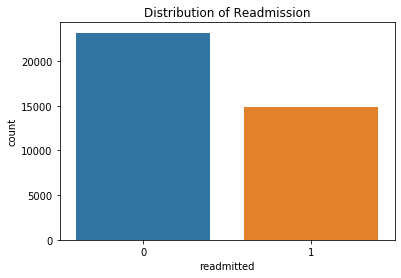

In [50]:
# Data Visualizations
# Distribution of Readmission 

sns.countplot(train_final['readmitted']).set_title('Distribution of Readmission')
plt.show()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

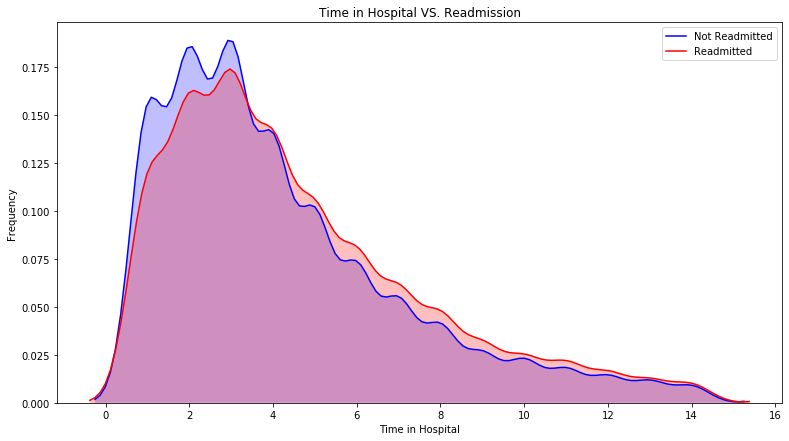

In [51]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train_final.loc[(train_final['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(train_final.loc[(train_final['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

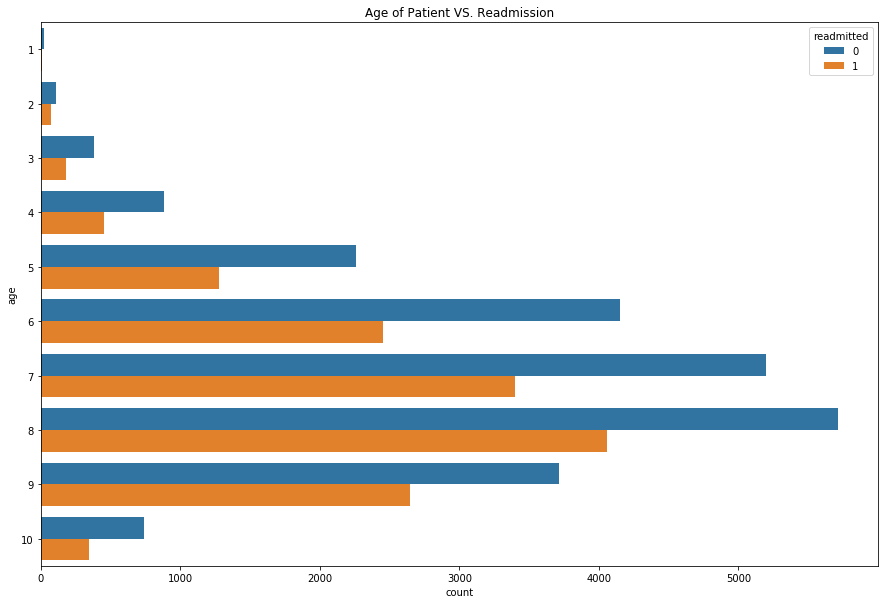

In [52]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= train_final['age'], hue = train_final['readmitted']).set_title('Age of Patient VS. Readmission')

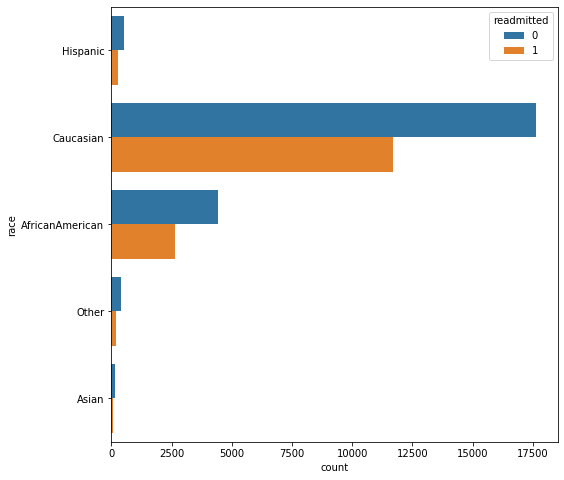

In [53]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = train_final['race'], hue = train_final['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

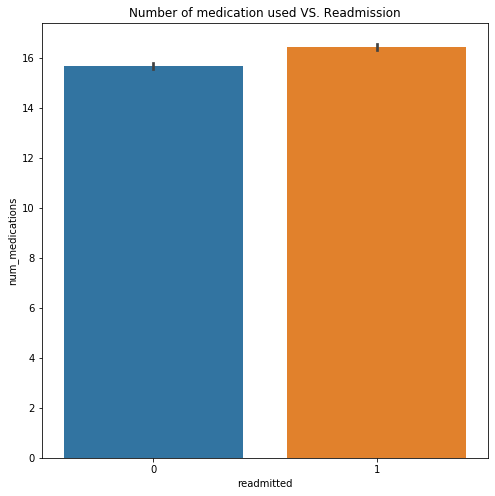

In [54]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = train_final['readmitted'], y = train_final['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

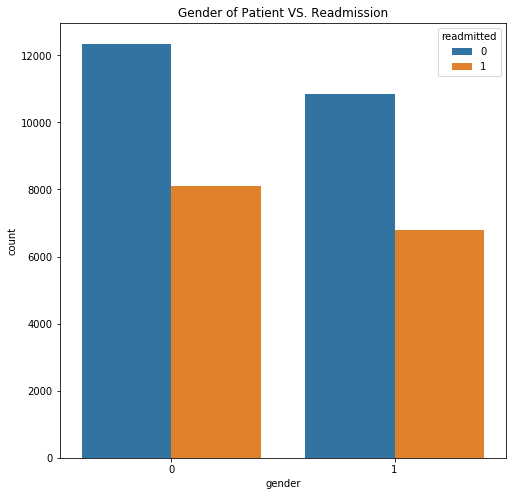

In [55]:
fig = plt.figure(figsize=(8,8))
sns.countplot(train_final['gender'], hue = train_final['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

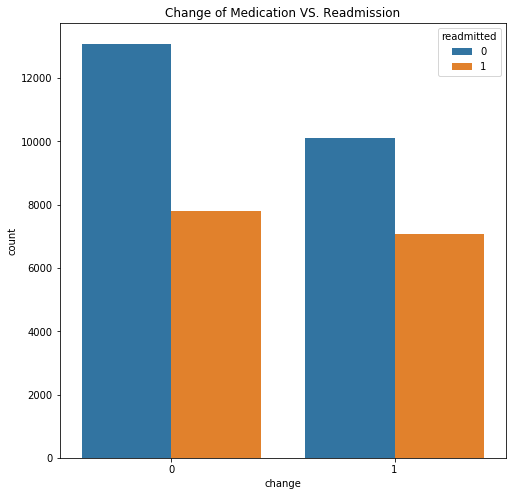

In [56]:
fig = plt.figure(figsize=(8,8))
sns.countplot(train_final['change'], hue = train_final['readmitted']).set_title('Change of Medication VS. Readmission')

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

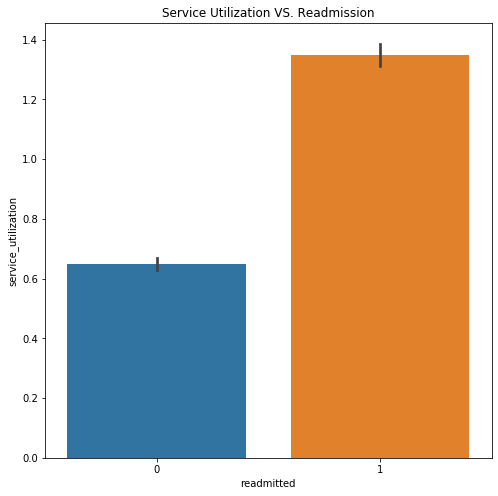

In [57]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = train_final['service_utilization'], x = train_final['readmitted']).set_title('Service Utilization VS. Readmission')

In [58]:
#creating a list of categorical and numeric lists for train

categorical = train_final.select_dtypes(include=['object'])
print(categorical.columns.values)

['race']


In [59]:
numeric=train_final.select_dtypes(exclude=['object'])
print(numeric.columns.values)

['gender' 'age' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_diagnoses' 'X1' 'X2' 'change' 'diabetesMed'
 'readmitted' 'service_utilization' 'numchange' 'diag_1_category']


In [60]:
#creating a list of categorical and numeric lists for test

categorical_test = test_final.select_dtypes(include=['object'])
print(categorical_test.columns.values)

['race']


In [61]:
numeric_test = test_final.select_dtypes(exclude=['object'])
print(numeric_test.columns.values)

['gender' 'age' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_diagnoses' 'X1' 'X2' 'change' 'diabetesMed'
 'service_utilization' 'numchange' 'diag_1_category']


In [62]:
# creating dummies for all the categorical variables and deleting the original columns

nominal_columns = ['race']
dummy_df = pd.get_dummies(train_final[nominal_columns])
train_final = pd.concat([train_final, dummy_df], axis=1)
train_final = train_final.drop(nominal_columns, axis=1)

In [63]:
dummy_df1 = pd.get_dummies(test_final[nominal_columns])
test_final = pd.concat([test_final, dummy_df1], axis=1)
test_final = test_final.drop(nominal_columns, axis=1)

In [64]:
train_final.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,X1,X2,change,diabetesMed,readmitted,service_utilization,numchange,diag_1_category,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,1,9,4,39,1,9,9,-99,-99,0,1,1,6,2,0,0,0,0,1,0
1,1,7,3,34,1,12,6,-99,-99,0,0,0,0,2,3,0,0,1,0,0
2,0,6,6,50,2,24,9,-99,-99,1,1,1,5,3,3,0,0,1,0,0
3,0,8,5,63,0,14,7,-99,0,1,1,1,0,3,1,1,0,0,0,0
4,1,8,9,17,1,11,9,1,-99,0,0,1,0,2,0,0,0,1,0,0


In [65]:
test_final.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,X1,X2,change,diabetesMed,service_utilization,numchange,diag_1_category,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,0,8,3,45,3,10,8,-99,-99,0,1,1,2,2,0,0,1,0,0
1,1,7,2,10,1,16,5,-99,-99,0,1,1,2,7,0,0,1,0,0
2,1,8,11,41,1,15,9,-99,0,0,1,1,2,7,1,0,0,0,0
3,0,8,1,71,2,11,9,-99,-99,0,0,0,2,0,0,0,1,0,0
4,0,6,7,59,2,18,7,-99,1,1,1,0,2,7,1,0,0,0,0


In [66]:
#Modelling and Predictions/Recomendations

X = train_final.drop("readmitted",axis=1)
y = train_final['readmitted']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV


In [69]:
clf = RandomForestClassifier(n_estimators=64, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [70]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

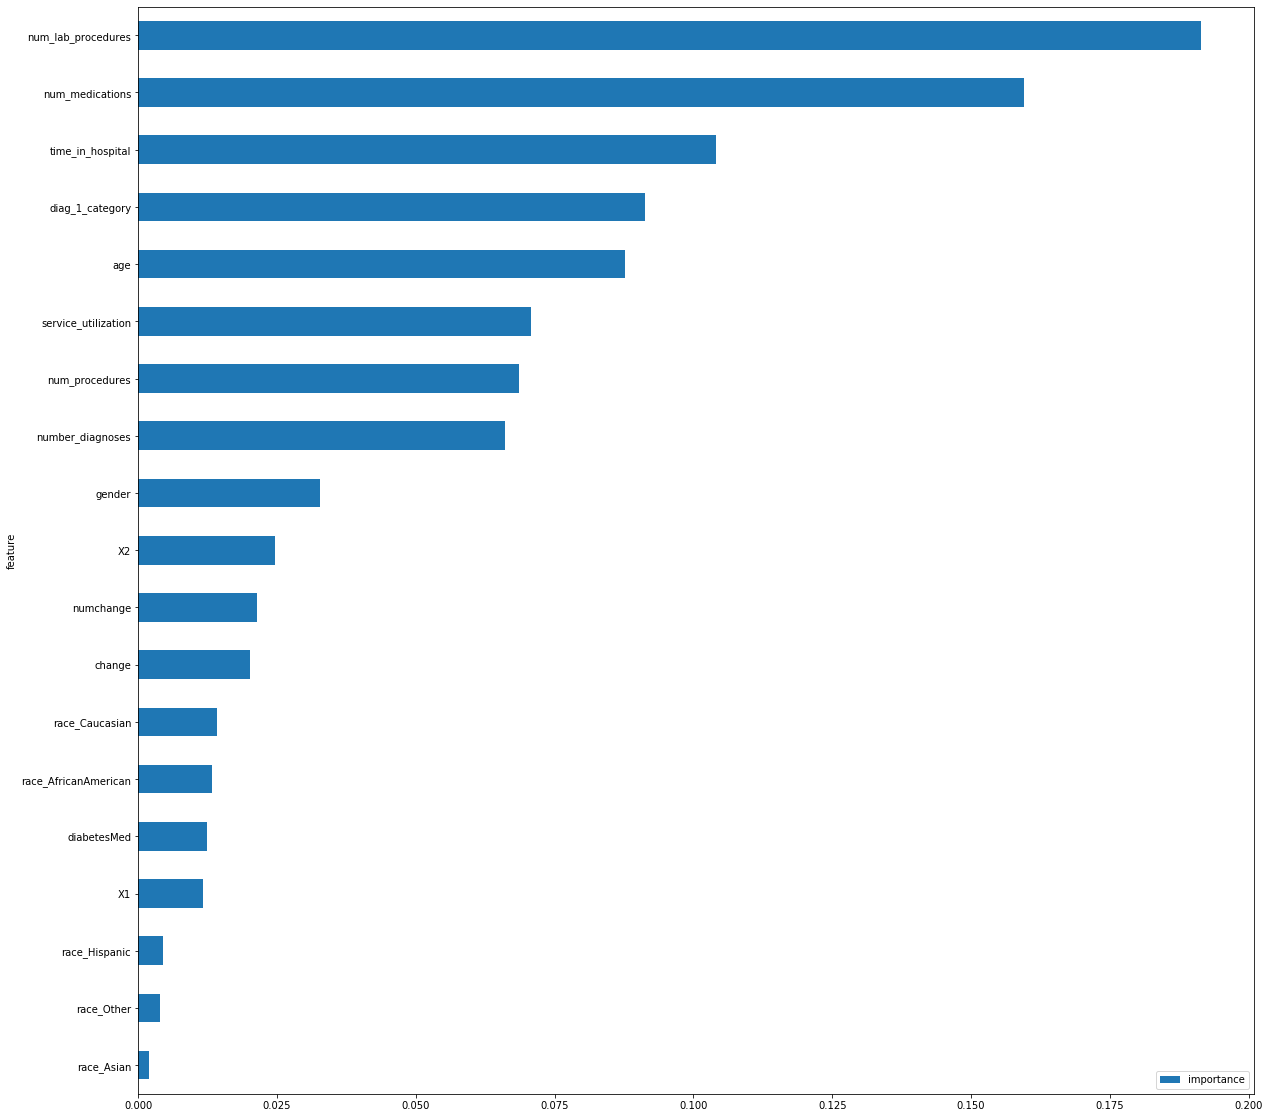

In [71]:
features.plot(kind='barh', figsize=(20, 20))

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier(max_depth=7, n_estimators=200)

In [74]:
xgb.fit(X_train, y_train)

[17:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [75]:
y_prediction = xgb.predict(X_test)

In [76]:
#Performance Evaluation of Model using F1 score

from sklearn.metrics import f1_score

In [77]:
f1_score = f1_score(y_test, y_prediction)
print("F1 score of model is : ", f1_score)

F1 score of model is :  0.44804687499999996


In [78]:
#Prediction on test data using trained model.

y_pred = xgb.predict(test_final)

In [79]:
submission_df = pd.DataFrame(columns=['encounter_id','prediction'])

In [80]:
submission_df['encounter_id'] = test1['encounter_id']
submission_df['prediction'] = list(y_pred)

In [81]:
submission_df.to_csv("submission.csv")